In [ ]:
import os
import cv2
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Define the path and categories
data_dir = '/content/drive/MyDrive/OS Collected Data/sample/Training'
categories = ['Normal', 'Osteopenia', 'Osteoporosis']
img_size = 100

In [ ]:
# 2. Load and preprocess images
X = []
y = []

for label in categories:
    folder_path = os.path.join(data_dir, label)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            X.append(img.flatten())  # Flatten for logistic regression
            y.append(label)


In [ ]:
# 3. Convert to arrays
X = np.array(X)
y = np.array(y)

In [ ]:

# 4. Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 0, 1, 2 for Normal, Osteopenia, Osteoporosis

In [ ]:
 #5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:


# 6. Train logistic regression
clf = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, verbose=1)
clf.fit(X_train, y_train)


-- Epoch 1
Norm: 394214.88, NNZs: 10000, Bias: -212.436182, T: 1245, Avg. loss: 96718476.325373
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 354533.04, NNZs: 10000, Bias: -299.758121, T: 2490, Avg. loss: 41609301.130143
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 325283.00, NNZs: 10000, Bias: -336.951993, T: 3735, Avg. loss: 23495109.075392
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 295208.64, NNZs: 10000, Bias: -365.442315, T: 4980, Avg. loss: 17866981.982175
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 273385.40, NNZs: 10000, Bias: -384.971561, T: 6225, Avg. loss: 11570633.249933
Total training time: 0.18 seconds.
-- Epoch 6
Norm: 257858.89, NNZs: 10000, Bias: -401.661830, T: 7470, Avg. loss: 9362731.610820
Total training time: 0.22 seconds.
-- Epoch 7
Norm: 243496.02, NNZs: 10000, Bias: -414.812650, T: 8715, Avg. loss: 8445961.815656
Total training time: 0.26 seconds.
-- Epoch 8
Norm: 232842.32, NNZs: 10000, Bias: -424.692393, T: 9960, Avg. loss: 58512

SGDClassifier(loss='log_loss', verbose=1)

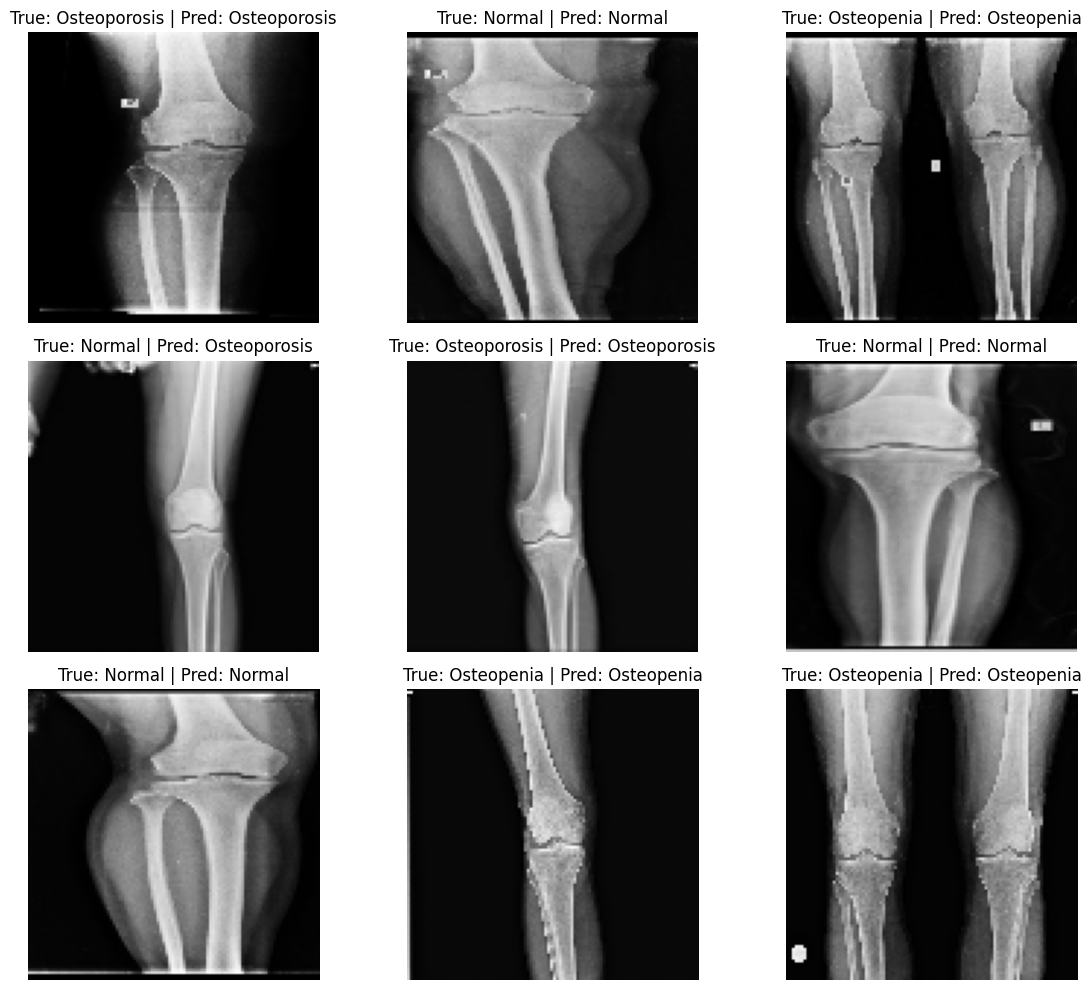

In [ ]:
import matplotlib.pyplot as plt

# Show 9 random test images with predictions
plt.figure(figsize=(12, 10))
for i in range(9):
    idx = np.random.randint(0, len(X_test))
    img = X_test[idx].reshape(img_size, img_size)  # Reshape back to image
    true_label = le.inverse_transform([y_test[idx]])[0]
    predicted_label = le.inverse_transform([y_pred[idx]])[0]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label} | Pred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


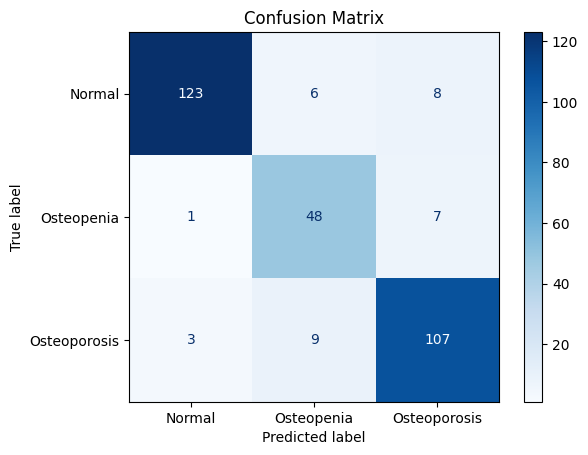

Classification Report:
               precision    recall  f1-score   support

      Normal       0.97      0.90      0.93       137
  Osteopenia       0.76      0.86      0.81        56
Osteoporosis       0.88      0.90      0.89       119

    accuracy                           0.89       312
   macro avg       0.87      0.88      0.88       312
weighted avg       0.90      0.89      0.89       312



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=le.classes_)
print("Classification Report:\n", report)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py:395: RuntimeWarning: invalid value encountered in divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py:395: RuntimeWarning: invalid value encountered in divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Cons

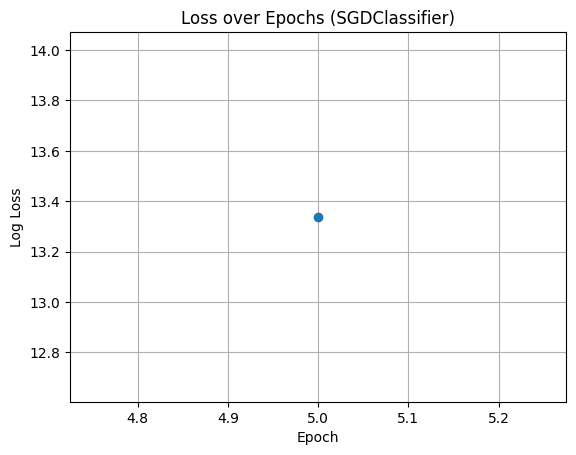

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.utils import shuffle

losses = []
clf = SGDClassifier(loss='log_loss', max_iter=1, learning_rate='optimal', warm_start=True)

# Simulate epochs
epochs = 30
X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train)

for epoch in range(epochs):
    clf.fit(X_train_shuffled, y_train_shuffled)
    y_prob = clf.predict_proba(X_train_shuffled)

    # Compute log loss manually
    eps = 1e-15
    y_prob = np.clip(y_prob, eps, 1 - eps)
    log_loss = -np.mean(np.log(y_prob[range(len(y_train_shuffled)), y_train_shuffled]))
    losses.append(log_loss)

# Plot loss
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Loss over Epochs (SGDClassifier)')
plt.grid()
plt.show()
